# Define Problem

We are given survival data in regards to the Titanic incident. I am going to use Machine Learning techniques to build a model that will be able to classify a person as either a "survivor" or "died" based on the variables given.

# Import Libraries 

In [1]:
#necessary libraries
import pandas as pd 
import matplotlib
import numpy as np 
import scipy as sp 

In [2]:
#download a package to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Modeling Libraries

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Model validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import missingno as msno

#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

# Import Data

In [4]:
#read in the data
train_data = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1520825807&Signature=XB1u3D6vDkndz4syPROP%2FlUTW%2BmlobQAFXuSc0vljrJ0sl2O3Q1ra0EV5BAz6z6fl01%2BJ8CcfT%2BxAGAUU3Pje9SvJQdc%2FaeCKxqj55vsdVHxtj6wo4lGCBf8oB0zCtyTv7JyoTzQtgmhPi0yxZf49AX3LBk60sQZxdHI1eScx3CzWPLrrFLCPPiunWlsgz2i%2FSE2dqBbVpKOPrm5%2B3se8h373tn7rwDgs7DYm%2BOM9EaZOpkUKYUzPds4dcD9CgSe4vJNSvilQH2HZvCk%2BkYLaujnzkeYAQzAJULKxaonkgdOa0PqZ6%2FiZqEbYbOWzAu2twSs12ue43%2Fq0K7OzdnqSA%3D%3D')

Now that the data has been read into Python we will want to preview the data set.

In [5]:
#preview data
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the data preview I can see: 12 variables, 891 observations, which features are missing data, and how variables are encoded.  

In [6]:
#describe data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From describing the data I learn basic information of min, max, values, mean, and standard deviation.

# Plot Data

Now that I have a basic knowledge of the data set, I will plot the data to understand how the data interacts with each other.

In [7]:
#function to help with plotting correlation
def plot_correlation_map( df ):
    corr = train_data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
#function to help with ploting distribution
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

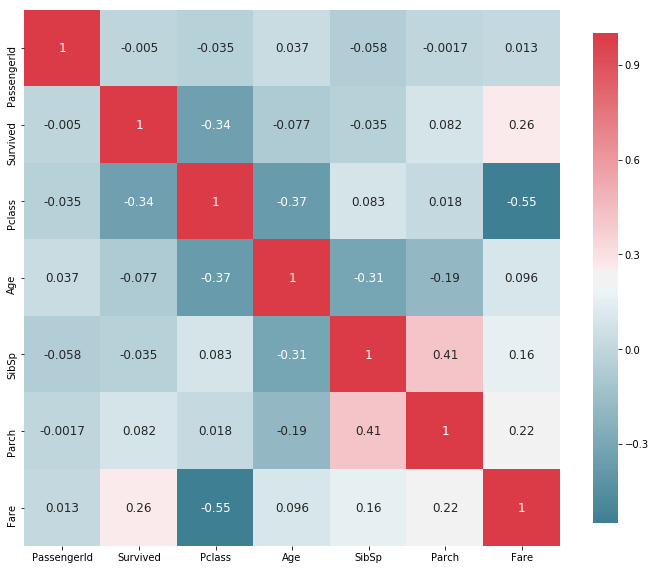

In [8]:
#graph data
plot_correlation_map(train_data)

The heat map is helpful as it outlines how variables are related with one another. Now lets look at individual features and how they relate to survival.

Text(9.57988,0.5,'Odds Survived')

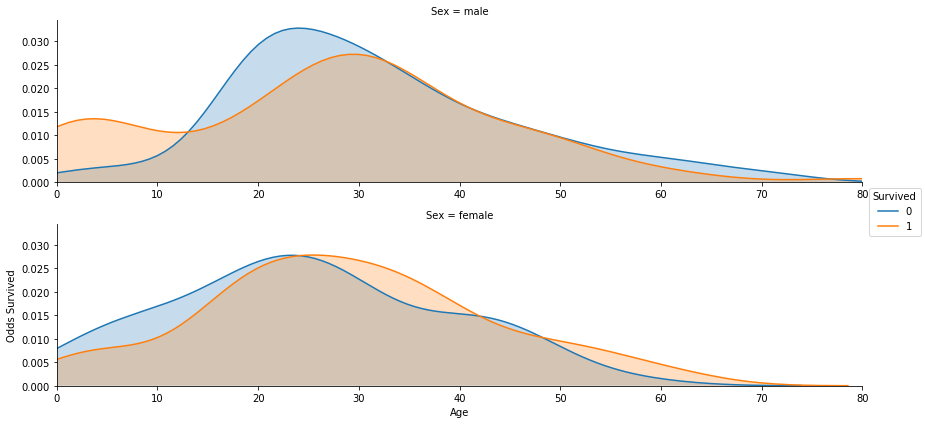

In [9]:
#distribution plot
plot_distribution(train_data , var = 'Age' , target = 'Survived' , row = 'Sex')
plt.ylabel('Odds Survived')

This graph gives us an idea of whether or not age played a role in survival. The top graph is the relationship of survival and age on all males and the bottom graph is the relationship of survival on age for all females.

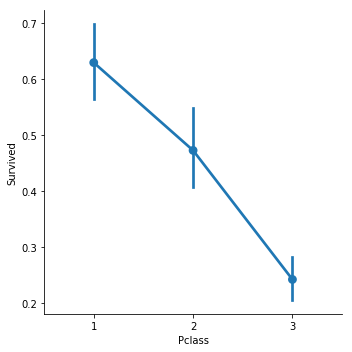

In [10]:
#Graph data
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train_data,size=5)

I can see that your Pclass contributed to your survival.

# Data Cleaning: Correcting, Completing, Creating and Converting

1. Correcting: I need to dig into the data to make sure their are no incorrect values such as an unrealisitc observation for an age or a negative value for a Fare
2. Completing: I will have to check to see if there are any "NaN" (Not a Number) values in any of the variables. After we find which features having missing data I then have to explore the best way to fill in each observations. this can be done by filling in missing values with mean, median or mode. Sometimes however it takes other creative methods.
3. Creating: Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome.
4. Converting: Lastly I will convert any "string/object"variables (non-numeric values) into numeric features so that they can be analyzed. 

# Correcting

In [11]:
#Describing "Fare" to see if there are any outliers
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
#Describing "Age" to make sure there are no negative or large values.
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
#Making sure there are only two "Sex" observations
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

It appears that there is not a need for correcting in the data set. After describing a few of the features that would most likely have a misrepresentation of data.

# Completing

Before we can complete feature observations we need to find the features with missing observations.

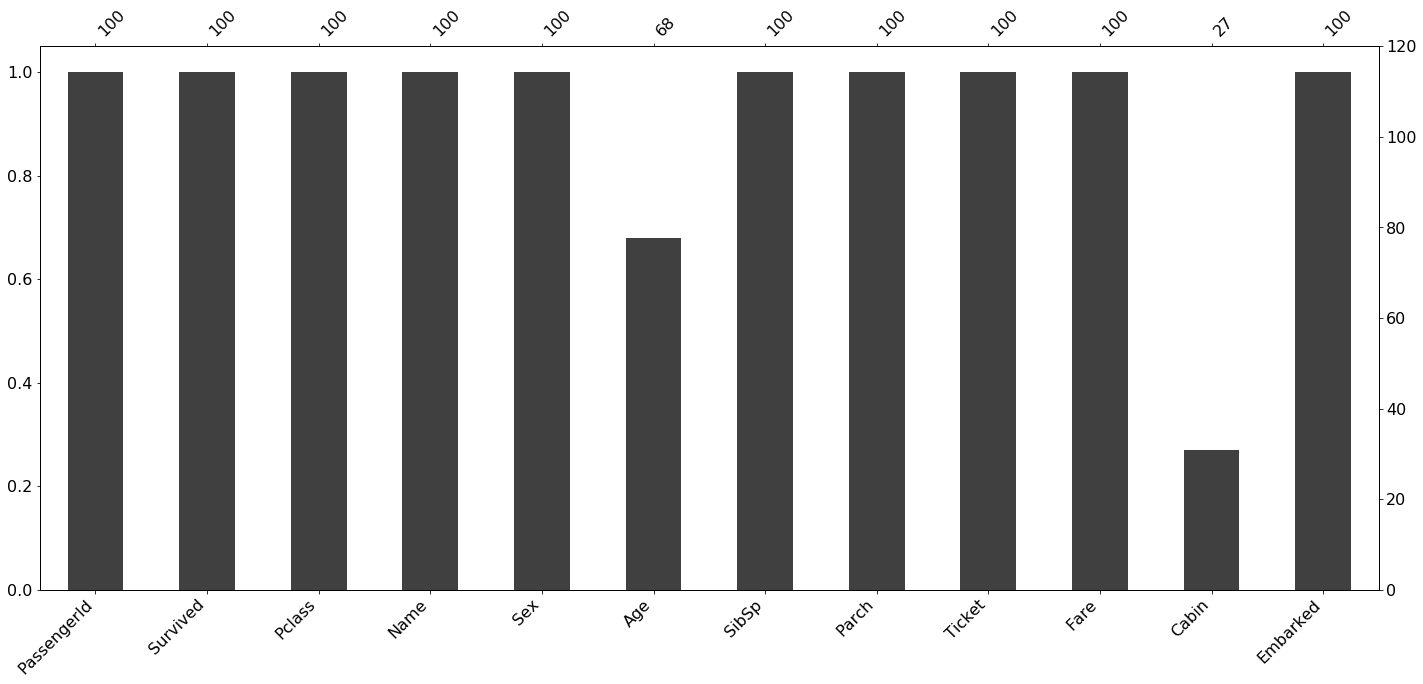

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Visualizing the missing data
msno.bar(train_data.sample(100))
#finding the features with "NaN" values
train_data.isnull().sum()

Now that the features with missing data is obvious we can begin to strategize the best method to fill in the missing values.

In [15]:
#Start with Age
train_data['Age'].mean()

29.69911764705882

In [16]:
#complete "Age" variable with the median
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

We are using mean because the mean is the average of the numbers: a calculated "central" value of a set of numbers.

In [17]:
#Complete "Embarked" Variable with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

We are using the mode for "Embarked" because we are only missing two observations so filling the "NaN" values with the most frequently occuring data makes the most sense.

In [18]:
#checking if these two features no longer have missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

the completing phase also includes deterimining whether or not a features are worth keeping. Next we will look at dropping features.

In [19]:
#Droping three features
train_data.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

Reasons for dropping these three variables:
1. "PassengerId" is not need in prediciting whether or not a passenger survived
2. "Cabin" is missing close to 80% of its values. "Cabin" information is also unique to most passengers so it would be difficult to replace. Also, we have "Pclass" as a feature so "Cabin" isn't necessary as "Plcass" will determine which section of the boat they resided. 
3. "TIcket" is being dropped for similar reasons as "Cabin". Every passenger will have a unique ticket number so we cannot fill in this information with mean, median, or mode. Also the feature "Pclass" will determine where on the boat they were residing.

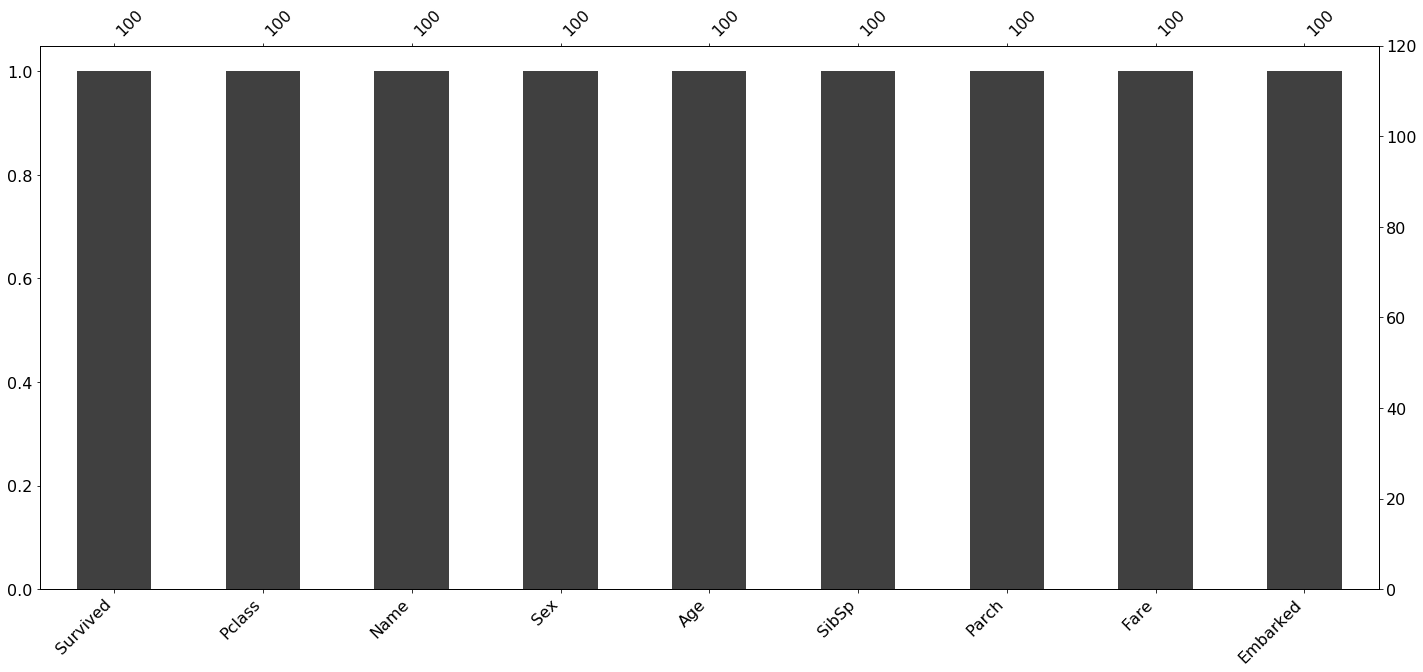

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
#double checking that all values are filled and columns were dropped
msno.bar(train_data.sample(100))
train_data.isnull().sum()

Finished the completing section of my data cleaning.

# Creating

I will engineer a few features to make the analysis more effective.

In [21]:
#create a "FamilySize" variable from the "Parch" and "SibSp" featues
train_data['FamilySize'] = train_data ['SibSp'] + train_data['Parch'] + 1

In [22]:
#create a variable for people who traveled alone
train_data['IsAlone'] = 1 #initialize to yes/1 is alone
train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0

"FamilySize" would be a better feature to use rather than SibSp and Parch because we want to see if the amount of people in your family had an effect on your survival where how many siblings really doesn't capture that information. Then by creating FamilySize I will need to create a variable for those who traveled alone.

In [23]:
#Seperate title from name
train_data['Title'] = train_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [24]:
#cleanup rare title names
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: 
title_names = (train_data['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

"Name" may not be an incredibly important features for determining a persons survival but their title in their name could play a major role. So with feature engineering I seperated the title from the name so that I could use that data.

In [25]:
#preview the data
train_data.info()
train_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
445,1,1,"Dodge, Master. Washington",male,4.000000,0,2,81.8583,S,3,0,Master
59,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,46.9000,S,8,0,Master
514,0,3,"Coleff, Mr. Satio",male,24.000000,0,0,7.4958,S,1,1,Mr
492,0,1,"Molson, Mr. Harry Markland",male,55.000000,0,0,30.5000,S,1,1,Mr
543,1,2,"Beane, Mr. Edward",male,32.000000,1,0,26.0000,S,2,0,Mr
662,0,1,"Colley, Mr. Edward Pomeroy",male,47.000000,0,0,25.5875,S,1,1,Mr
547,1,2,"Padro y Manent, Mr. Julian",male,29.699118,0,0,13.8625,C,1,1,Mr
512,1,1,"McGough, Mr. James Robert",male,36.000000,0,0,26.2875,S,1,1,Mr
474,0,3,"Strandberg, Miss. Ida Sofia",female,22.000000,0,0,9.8375,S,1,1,Miss
135,0,2,"Richard, Mr. Emile",male,23.000000,0,0,15.0458,C,1,1,Mr


Finished with the Creating Phase of the project.

# Converting

Now I will need to convert data from "Object/String" to "Numeric" so that I can preform mathemtical analysis on the data.

In [26]:
#pulling up all "object" variables
train_data.select_dtypes(include=['object']).head()

,Name,Sex,Embarked,Title
0,"Braund, Mr. Owen Harris",male,S,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,C,Mrs
2,"Heikkinen, Miss. Laina",female,S,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,S,Mrs
4,"Allen, Mr. William Henry",male,S,Mr


I will drop the "Name" column because I have extracted the informaion needed from the "Name" feature and put the new information into a new variable labeled "Title".

In [27]:
#dropping "Name"
train_data.drop(['Name'], axis=1, inplace=True)

I will label encode the rest of the object variables.

In [28]:
#label encoding
le = LabelEncoder()
for col in train_data.columns.values:
    if train_data[col].dtypes=='object':
        data=train_data[col].append(train_data[col])
        le.fit(data.values)
        train_data[col]=le.transform(train_data[col])

In [29]:
#get dummies
pd.get_dummies(train_data).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,22.0,1,0,7.2500,2,2,0,11
1,1,1,0,38.0,1,0,71.2833,0,2,0,12
2,1,3,0,26.0,0,0,7.9250,2,1,1,8
3,1,1,0,35.0,1,0,53.1000,2,2,0,12
4,0,3,1,35.0,0,0,8.0500,2,1,1,11


In [30]:
#double check that all object variables were converted
train_data.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [31]:
#Check to see how all variables are encoded
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null int64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


After converting all object variables through labelencoding I have finished my data cleaning.

# Modeling

Lets establish our target as "Survived".

In [32]:
#set target equal to "Survived"
target = train_data.Survived

In [33]:
#Drop "Survived"
train_data.drop(['Survived'], axis=1, inplace=True)

Next I will split my data into a train set and a test set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.2, random_state=42)

In [35]:
#Check the balance of the data
pd.Series(y_train).value_counts(normalize=True)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

With a 60/40 balance It will be safe to use Accuracy as our metric, because the data is decently balanced. 

Now I will run my data through various classification models:
1. Logistic Regression
2. KNeighbors
3. Decision Tree with AdaBoost
4. SVM
5. XGB Classifier
6. Random Forest

# LogisticRegression

In [36]:
logreg = linear_model.LogisticRegression()
logreg.fit(train_data, target)
sum(target == logreg.predict(train_data))

717

The logestic regression predicted 716 out of 891. Not bad!

In [37]:
clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [38]:
print("Train acc: {}".format(accuracy_score(y_train, train_predictions)))
print("Test acc: {}".format(accuracy_score(y_test, test_predictions)))

Train acc: 0.8019662921348315
Test acc: 0.7932960893854749


79% is a decent score.

# KNeighbors

In [39]:
clf = KNeighborsClassifier()
gridsearch = GridSearchCV(clf, {"n_neighbors": [1, 3, 5, 7, 9, 11, 13], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='f1')
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(X_train)
print("Train F1: {}".format(f1_score(y_train, y_pred_train)))
print("Test Classification Report:")
y_pred_test = gridsearch.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Train Accuracy: {}\tTest accuracy: {}".format(accuracy_score(y_train, y_pred_train),
                                                     accuracy_score(y_test, y_pred_test)))

Best Params: {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Train F1: 0.9771863117870723
Test Classification Report:
             precision    recall  f1-score   support

          0       0.77      0.84      0.80       105
          1       0.74      0.65      0.69        74

avg / total       0.76      0.76      0.76       179

Train Accuracy: 0.9831460674157303	Test accuracy: 0.7597765363128491


The stark difference between the train and test accuracy may suggest the model is overfit. but at 75% accuracy it didn't do better than LogisticRegression.

# DecisionTree With AdaBoost

In [40]:
#I will use decision tree as my base model
tree_model = tree.DecisionTreeClassifier()
#I will use AdaBoost to boost the model
clf = AdaBoostClassifier(n_estimators=100, base_estimator=tree_model, learning_rate=1)
#fit the model
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [41]:
#run it through the test portion of the split data
y_predict = clf.predict(X_test)

In [42]:
#print accuracy
accuracy_score(y_test, y_predict)

0.8324022346368715

83% percent accuracy is the best score yet. 

# SVM

In [43]:
#write up the SVM
clf = SVC(max_iter=1)
#Gridsearch
gridsearch = GridSearchCV(clf, {"C": [0.2, 0.5, 0.7], "kernel": ['linear', 'poly', 'rbf'], 
                                'degree': [1, 2, 3], 'gamma': [1, 5, 11]}, scoring='accuracy')
#fit the data
gridsearch.fit(X_train, y_train)
#print the best parameters and accuracy
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(accuracy_score(y_test, gridsearch.predict(X_test))))

Best Params: {'C': 0.2, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}
Test Accuracy: 0.659217877094972


at 65% accuracy the SVM is the worst performer so far.

# XGBClassifier

In [44]:
#XGBoost
xclas = XGBClassifier() 
#Fit the model
xclas.fit(X_train, y_train)  
the_answer = xclas.predict(X_test)
#Print Accuracy
print('Test Accuracy: {}'.format(accuracy_score(y_test, xclas.predict(X_test))))

Test Accuracy: 0.8156424581005587


/Users/connerleavitt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/connerleavitt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


80% accuracy is comparable to the Decision Tree model.

# Random Forest

In [45]:
random_forest = RandomForestClassifier(n_estimators=10000)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8435754189944135

84% accuracy is the best score out of all the models. 

# Model Scores

1. Logistic Regression_____79%
2. KNeighbors______________75%
3. Decision Tree with Adaboost___________82%
4. SVM_____________________65%
5. XGB Classifier_________ 80%
6. Random Forest__________ 84%

From all my Models the best performing were in order: Random Forest, Decision Tree, and XGB Classifier. Considering that total percentage died on board was 68% my models are predicting around 15% better than just if my model guessed everyone died. Although I am impressed with my data cleaning, feature engineering, and modeling there is much room for improvement. 80% accuracy is a decent score, but I would still be hesitant in trusting my model.

# END OF HOMEWORK. 

# Now I will apply everything to my test data set

In [47]:
#Import test data set
test_data = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/3136/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1520825912&Signature=PBRzTnojL%2BDKoZ84vHXRP449Vf5qxuQX6wU529afJ%2FSt6MinRhMF2LPBOeutOt6%2FAsGeuKgkLE4mYP3EfqM3jNUWcwZm0OYyQ8ne%2BEP6oDoRfgevWSggxQQXbDZuAVazNI8%2F4kveWKU0zOKBXq9r8Oc%2FZ6AFxILwgTeQ0eKObhC2iLoJtxDztdhz40uKZXwh58pBdGNFicpJdsTyloL%2FzyUTomXd%2BP6cuQJyuqkxCUMIwv%2Bjo6jXUJkAKPS32aSjiUsoawA7KXLlN8%2FMHoAYkoMj0p%2F8uviraReQGLMDfYRpMhbmYM%2FIVoxrPbRYBERUgfDziqZpEjaIlx1jK6e3hA%3D%3D')

In [48]:
#preview Data
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
#Describe data
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Correcting

In [50]:
#Describing "Fare" to see if there are any outliers
test_data['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [51]:
#Describing "Age" to make sure there are no negative or large values.
test_data['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [52]:
#Making sure there are only two "Sex" observations
test_data['Sex'].unique()

array(['male', 'female'], dtype=object)

It appears that there is not a need for correcting in the data set. After describing a few of the features that would most likely have a misrepresentation of data.

# Completing

Before we can complete feature observations we need to find the features with missing observations.

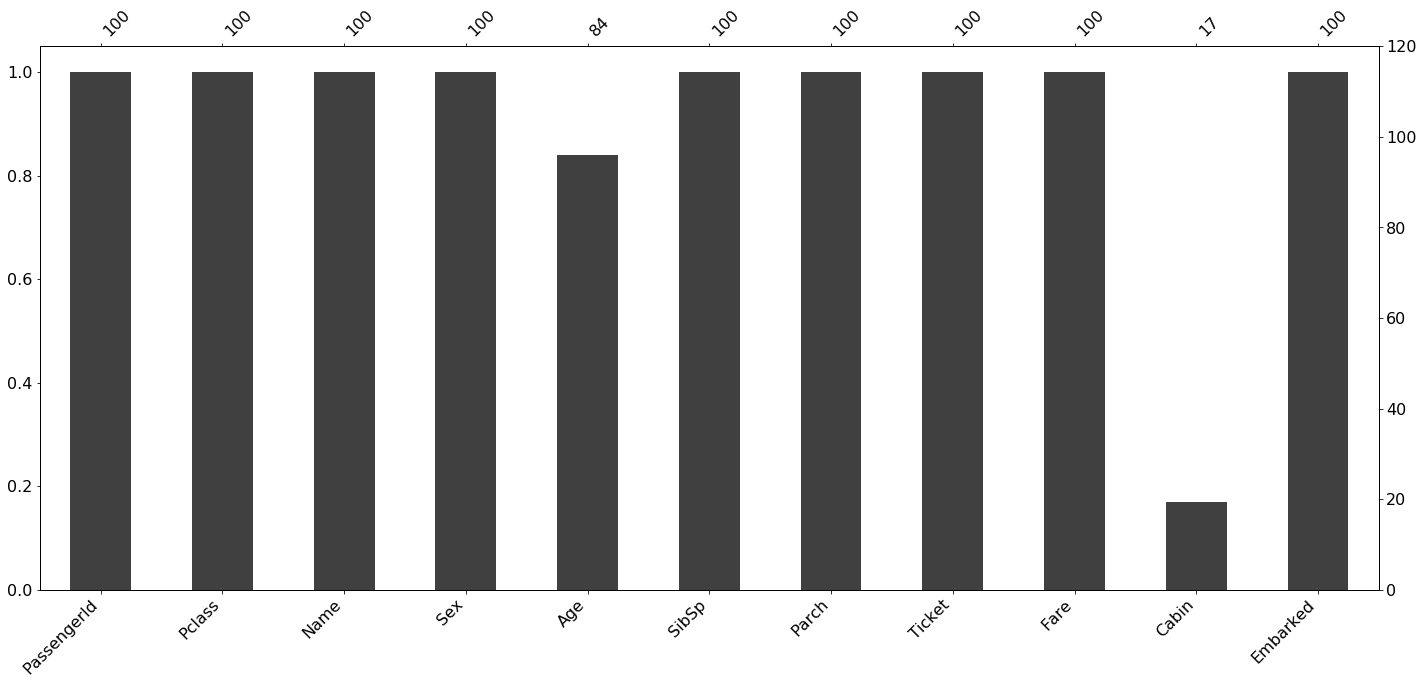

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
#Visualizing the missing data
msno.bar(test_data.sample(100))
#finding the features with "NaN" values
test_data.isnull().sum()

In [54]:
#complete "Age" variable with the median
test_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

In [55]:
train_data['Fare'].mean()

32.2042079685746

In [56]:
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)

In [57]:
#Save Test IDs 
test_ids = test_data["PassengerId"]

In [58]:
#Droping three features
test_data.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)

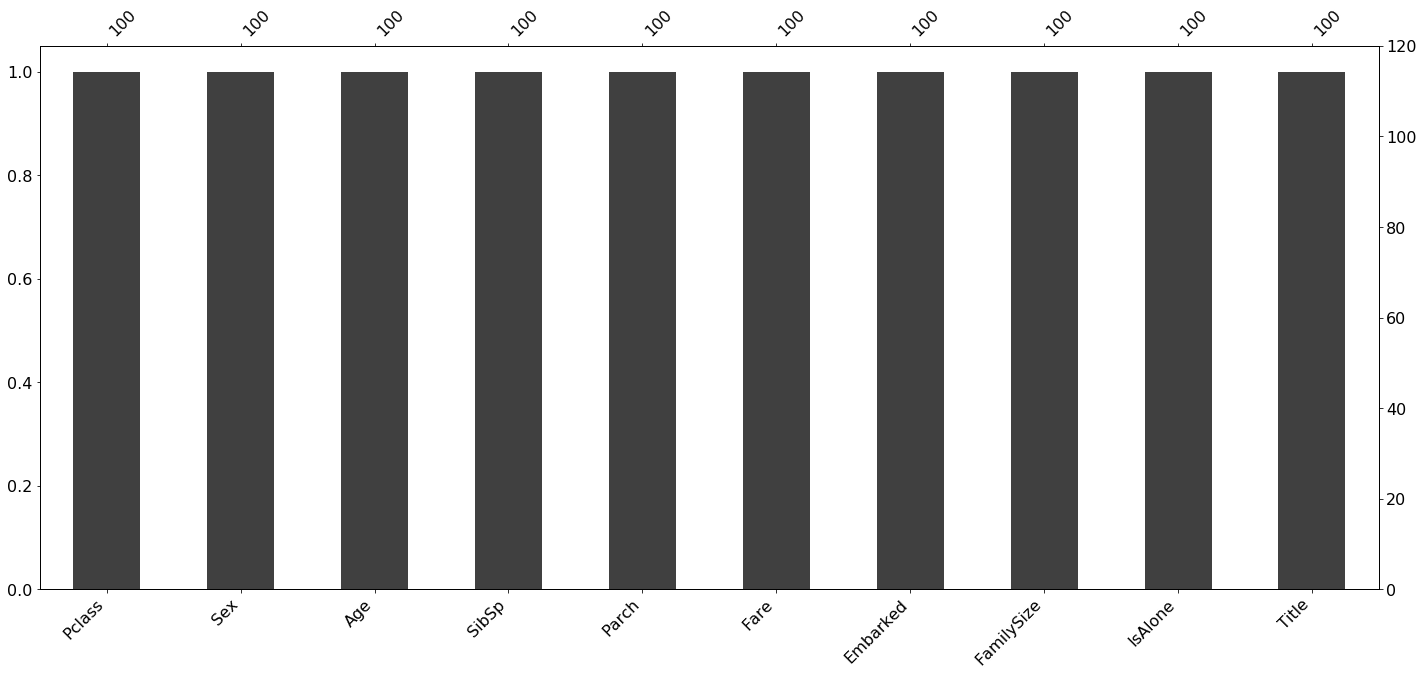

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [59]:
#double checking that all values are filled and columns were dropped
msno.bar(train_data.sample(100))
train_data.isnull().sum()

# Creating

In [60]:
#create a "FamilySize" variable from the "Parch" and "SibSp" featues
test_data['FamilySize'] = test_data ['SibSp'] + test_data['Parch'] + 1

In [61]:
#create a variable for people who traveled alone
test_data['IsAlone'] = 1 #initialize to yes/1 is alone
test_data['IsAlone'].loc[test_data['FamilySize'] > 1] = 0

In [62]:
#Seperate title from name
test_data['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [63]:
#cleanup rare title names
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: 
title_names = (test_data['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

In [64]:
#preview the data
test_data.info()
test_data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null object
FamilySize    418 non-null int64
IsAlone       418 non-null int64
Title         418 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
41,1,"Franklin, Mr. Thomas Parham",male,29.699118,0,0,26.5500,S,1,1,Mr
400,1,"Bonnell, Miss. Caroline",female,30.000000,0,0,164.8667,S,1,1,Miss
187,3,"Davies, Mr. Joseph",male,17.000000,2,0,8.0500,S,3,0,Mr
157,3,"Lundin, Miss. Olga Elida",female,23.000000,0,0,7.8542,S,1,1,Miss
297,3,"Samaan, Mr. Hanna",male,29.699118,2,0,21.6792,C,3,0,Mr
18,3,"Ilmakangas, Miss. Ida Livija",female,27.000000,1,0,7.9250,S,2,0,Miss
226,3,"Asplund, Mr. Johan Charles",male,23.000000,0,0,7.7958,S,1,1,Mr
73,1,"Ovies y Rodriguez, Mr. Servando",male,28.500000,0,0,27.7208,C,1,1,Mr
326,2,"Becker, Miss. Ruth Elizabeth",female,12.000000,2,1,39.0000,S,4,0,Miss
89,2,"Wells, Master. Ralph Lester",male,2.000000,1,1,23.0000,S,3,0,Master


In [65]:
#pulling up all "object" variables
test_data.select_dtypes(include=['object']).head()

,Name,Sex,Embarked,Title
0,"Kelly, Mr. James",male,Q,Mr
1,"Wilkes, Mrs. James (Ellen Needs)",female,S,Mrs
2,"Myles, Mr. Thomas Francis",male,Q,Mr
3,"Wirz, Mr. Albert",male,S,Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,S,Mrs


In [66]:
#dropping "Name"
test_data.drop(['Name'], axis=1, inplace=True)

In [67]:
le = LabelEncoder()
for col in test_data.columns.values:
    if test_data[col].dtypes=='object':
        data=test_data[col].append(test_data[col])
        le.fit(data.values)
        test_data[col]=le.transform(test_data[col])

In [68]:
pd.get_dummies(test_data).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,1,34.5,0,0,7.8292,1,1,1,5
1,3,0,47.0,1,0,7.0000,2,2,0,6
2,2,1,62.0,0,0,9.6875,1,1,1,5
3,3,1,27.0,0,0,8.6625,2,1,1,5
4,3,0,22.0,1,1,12.2875,2,3,0,6


In [69]:
#double check that all object variables were converted
test_data.select_dtypes(include=['object']).head()

""
0
1
2
3
4


In [70]:
#Check to see how all variables are encoded
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked      418 non-null int64
FamilySize    418 non-null int64
IsAlone       418 non-null int64
Title         418 non-null int64
dtypes: float64(2), int64(8)
memory usage: 32.7 KB


In [71]:
#Apply the trained model to the test score
Y_pred = random_forest.predict(test_data)

In [72]:
#show score
print(Y_pred)

[0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [73]:
#Convert to CSV
my_submission = pd.DataFrame({'Id': test_ids, 'Survived': Y_pred})

my_submission.to_csv('submission.csv', index=False)